In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
%pwd

'C:\\Users\\jwr19\\Documents\\Project\\project_one\\Folder2'

In [20]:
df = pd.read_csv("masks_cleaned1.csv")
df.loc[df["State_Tribe_Territory"]=="MN"]

,State_Tribe_Territory,Year,Month,Percent_Public_Face_Mask_Mandate
300,MN,2020,4,0.00
301,MN,2020,5,0.00
302,MN,2020,6,0.00
303,MN,2020,7,25.81
304,MN,2020,8,100.00
305,MN,2020,9,100.00
306,MN,2020,10,100.00
307,MN,2020,11,100.00
308,MN,2020,12,100.00
309,MN,2021,1,100.00


In [18]:
df.loc[df["State_Tribe_Territory"]=="SD"]["Percent_Public_Face_Mask_Mandate"].mean()

0.0

In [19]:
df.loc[df["State_Tribe_Territory"]=="MN"]["Percent_Public_Face_Mask_Mandate"].mean()

68.8175

In [23]:
Dict = {"States":[],"Mask_Mandate":[]}
states = df["State_Tribe_Territory"].unique()
for state in states:
    mask_mandate_mean = df.loc[df["State_Tribe_Territory"]==state]["Percent_Public_Face_Mask_Mandate"].mean()
    Dict["States"].append(state)
    Dict["Mask_Mandate"].append(mask_mandate_mean)

In [64]:
df1 = pd.DataFrame(Dict)
df1.loc[df1["Mask_Mandate"]>80].count()

States          18
Mask_Mandate    18
dtype: int64

In [65]:
df1.loc[df1["Mask_Mandate"]==0].count()

States          11
Mask_Mandate    11
dtype: int64

In [66]:
df1

,States,Mask_Mandate
0,AK,0.000000
1,AL,70.967500
2,AR,69.892500
3,AS,16.369167
4,AZ,0.000000
5,CA,78.610833
6,CO,70.967500
7,CT,96.031667
8,DC,87.634167
9,DE,92.857500


In [61]:
df1["==0"] = ""
df1["greater than 80"] = ""
df1["==100"] = ""
for index, row in df1.iterrows():
    df1[index,"==0"] = bool(row[1]==0)
#     df1[index,"greater than 80"] = bool(row[1]>80)
#     df1[index,"==100"] = bool(row[1]==100)
#     print(bool(row[1])==0)


In [68]:
df1.loc[df1["Mask_Mandate"]==0]

,States,Mask_Mandate
0,AK,0.0
4,AZ,0.0
10,FL,0.0
11,GA,0.0
15,ID,0.0
26,MO,0.0
27,MP,0.0
39,OK,0.0
44,SC,0.0
45,SD,0.0


In [88]:
df2 = pd.read_csv("../Folder2/Final_DeathRate_byState_042021.csv",skiprows=[0,1])
df2.rename(columns={"Unnamed: 0": "States","2021":"Death_Rate"},inplace=True)
df2.head()

,States,Death_Rate
0,State,NaN
1,RMI,0.000000
2,FSM,0.000000
3,AK,0.521335
4,UT,0.554209


In [89]:
df3 = df1.merge(df2,on="States")

In [91]:
mask_mandate_0 = df3.loc[df3["Mask_Mandate"]==0]["Death_Rate"]
mask_mandate_0

0     0.521335
4     2.008587
10    1.604283
11    1.835143
15    1.090293
26    1.492813
27    1.190476
39    1.519501
44    1.642731
45    1.603620
46    1.439293
Name: Death_Rate, dtype: float64

In [93]:
mask_mandate_80 = df3.loc[df3["Mask_Mandate"]>80]["Death_Rate"]

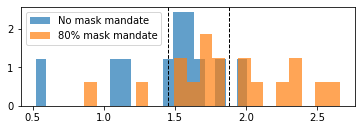

In [97]:
plt.subplot(2, 1, 2)
plt.hist(mask_mandate_0, 20, density=True, alpha=0.7, label="No mask mandate")
plt.hist(mask_mandate_80, 20, density=True, alpha=0.7, label="80% mask mandate")
plt.axvline(mask_mandate_0.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(mask_mandate_80.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend()  

In [99]:
stats.ttest_ind(mask_mandate_80, mask_mandate_0, equal_var=False)

Ttest_indResult(statistic=2.6821951317304333, pvalue=0.013207343490745269)

In [100]:
df3.Death_Rate.mean()

1.621831017193676

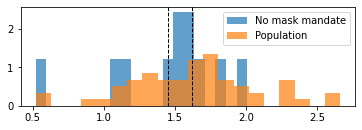

In [102]:
plt.subplot(2, 1, 2)
plt.hist(mask_mandate_0, 20, density=True, alpha=0.7, label="No mask mandate")
plt.hist(df3.Death_Rate, 20, density=True, alpha=0.7, label="Population")
plt.axvline(mask_mandate_0.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(df3.Death_Rate.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend()  

In [101]:
stats.ttest_1samp(mask_mandate_0, df3.Death_Rate.mean())

Ttest_1sampResult(statistic=-1.4213920385185574, pvalue=0.18562994428966018)

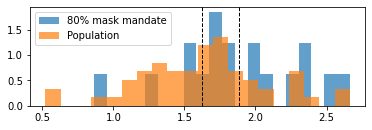

In [103]:
plt.subplot(2, 1, 2)
plt.hist(mask_mandate_80, 20, density=True, alpha=0.7, label="80% mask mandate")
plt.hist(df3.Death_Rate, 20, density=True, alpha=0.7, label="Population")
plt.axvline(mask_mandate_80.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(df3.Death_Rate.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend()  

In [104]:
stats.ttest_1samp(mask_mandate_80, df3.Death_Rate.mean())

Ttest_1sampResult(statistic=2.4421113209999334, pvalue=0.025824217165624407)

In [105]:
mask_mandate_80.mean()

1.8829601314703486

In [108]:
df3.head()

,States,Mask_Mandate,Death_Rate
0,AK,0.000000,0.521335
1,AL,70.967500,2.063941
2,AR,69.892500,1.707780
3,AS,16.369167,NaN
4,AZ,0.000000,2.008587


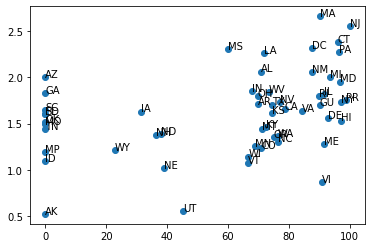

In [109]:
plt.scatter(df3.Mask_Mandate, df3.Death_Rate)
for index, row in df3.iterrows():
    #print(f"{row[0]} at coords: ({row[2]},{row[1]})")
    plt.annotate(row[0],(row[1],row[2]))